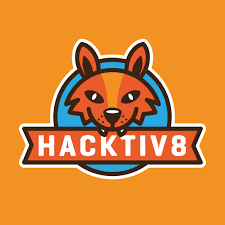

# Final Project 2 - Logistic Regression dan SVM

Kelompok 2:
1. ELSA WULANDARI
2. ANSHARULHAQ AMINSYAH
3. NAFIATUL RISA

# Latar Belakang

Pada project kali ini membahas tentang penerapan Supervised Manchine Learning yaitu metode Classification dengan menggunakan algoritma Logistic Regression dan Suport Vector Mancine(SVM).Data yang digunakan dalam project ini adalah dataset yang berisi dokumentasi kondisi cuaca dan apakah hari itu turun hujan atau tidak di beberapa daerah di Australia selama 10 tahun. Dataset ini terdiri dari 145460 baris dan 23 kolom yang dapat diakses pada link https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package.
Atribut yang menjadi variabel target adalah RainTomorrow yang berisi "No" (tidak terjadi hujan besok) dan "Yes" (terjadi hujan besok 1mm atau lebih).

# Objective

Project ini dibuat guna mengevaluasi konsep Logistic Regression dan SVM
sebagai berikut:
- Mampu memahami konsep Classification dengan Logistic Regression dan SVM
- Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression dan SVM
- Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat prediksi

# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, normalize, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import time
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Data Loading

**Menampilkan 5 data teratas dan 5 data terbawah.**

In [2]:
df= pd.read_csv('./dataset/weatherAUS.csv')

df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


**Menampilkan jumlah data non-null dan tipe data dari masing-masing kolomnya**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**Dimension of dataframe**

In [4]:
rows, columns = df.shape
print("Dimensi data:")
print(rows, "baris")
print(columns, "kolom")

Dimensi data:
145460 baris
23 kolom


**Index dataframe**

In [5]:
df.index

RangeIndex(start=0, stop=145460, step=1)

**View column names**

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

**View number unique data**

In [7]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

**Display unique value**

In [8]:
for col in df.columns:
    print("Nilai Unique Kolom", col)
    print(df[col].unique())
    print("-"*80)

Nilai Unique Kolom Date
['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']
--------------------------------------------------------------------------------
Nilai Unique Kolom Location
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
--------------------------------------------------------------------------------
Nilai Unique Kolom MinTemp
[13.4  7.4 12.9  9.2 17.5 14.6 14.3  7.7  9.7 13.1 15.9 12.6  8.4  9.8
 14.1 13.5 11.2 11.5 1

**View number of missing value**

In [9]:
print('Jumlah Missing Value tiap column: ')
df.isnull().sum().sort_values() #Check if any column has null values

Jumlah Missing Value tiap column: 


Date                 0
Location             0
MaxTemp           1261
MinTemp           1485
Temp9am           1767
WindSpeed9am      1767
Humidity9am       2654
WindSpeed3pm      3062
Rainfall          3261
RainToday         3261
RainTomorrow      3267
Temp3pm           3609
WindDir3pm        4228
Humidity3pm       4507
WindGustSpeed    10263
WindGustDir      10326
WindDir9am       10566
Pressure3pm      15028
Pressure9am      15065
Cloud9am         55888
Cloud3pm         59358
Evaporation      62790
Sunshine         69835
dtype: int64

**Check duplicate data**

In [10]:
print('Jumlah Duplicate Data ', df.duplicated().sum()) 

Jumlah Duplicate Data  0


**View Basic statistic numerical column**

In [11]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


**View Basic statistic categorical column**

In [12]:
df.describe(include="O")

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


**Analisis :**

Berdasarkan hasil diatas, ditemukan bahwa:
1. Dimensi data sejumlah 145460 baris dan 23 kolom dengan 16 kolom dengan tipe data float64 dan 7 kolom dengan tipe data object.
2. Kolom terdiri dari 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', dan 'RainTomorrow'.
3. Nilai Unique tiap kolom sejumlah :
| **Column** | **Jumlah Nilai Unique** |
| :------------: | :---------------------: |
| Date | 3436 |
| Location | 49 |
| MinTemp | 389 |
| MaxTem | 505 |
| Rainfall | 681 |
| Evaporation | 358 |
| Sunshine | 145 |
| WindGustDir | 16 |
| WindGustSpeed | 67 |
| WindDir9am | 16 |
| WindDir3pm | 16 |
| WindSpeed9am | 43 |
| WindSpeed3pm | 44 |
| Humidity9am | 101 |
| Humidity3pm | 101 |
| Pressure9am | 546 |
| Pressure3pm | 549 |
| Cloud9am | 10 |
| Cloud3pm | 10 |
| Temp9am | 441 |
| Temp3pm | 502 |
| RainToday | 2 |
| RainTomorrow | 2 |
4. Jumlah missing value tiap kolom adalah :
| **Column** | **Jumlah Missing Value** |
| :------------: | :---------------------: |
| Date | 0 |
| Location | 0 |
| MinTemp | 1485 |
| MaxTem | 1261 |
| Rainfall | 3261 |
| Evaporation | 62790 |
| Sunshine | 69835 |
| WindGustDir | 10326 |
| WindGustSpeed | 10263 |
| WindDir9am | 10566 |
| WindDir3pm | 4228 |
| WindSpeed9am | 1767 |
| WindSpeed3pm | 3062 |
| Humidity9am | 2654 |
| Humidity3pm | 4507 |
| Pressure9am | 15065 |
| Pressure3pm | 15028 |
| Cloud9am | 55888 |
| Cloud3pm | 59358 |
| Temp9am | 1767 |
| Temp3pm | 1767 |
| RainToday | 3261 |
| RainTomorrow | 3267 |
5. Tidak ada duplicate data

# Data Cleaning

**Drop Date column**

Date column dihapus karena value nya tidak dibutuhkan untuk EDA pada skenario kami.

In [13]:
df.drop("Date", axis = 1, inplace = True)

**Find categorical variables**

In [14]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


**Find numerical variables**

In [15]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 16 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


**Replacing null values in categorical variables with mode value**

Only fill 5 out of 6 categorical variables, because Location doesn't have row with missing value.

In [16]:
df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace=True)
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace=True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0], inplace=True)
df['RainToday'].fillna(df['RainToday'].mode()[0], inplace=True)
df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0], inplace=True)

**Filling the null values in numerical variable with median**

In [17]:
df = df.fillna(df.median())

Check if any column has null value

In [18]:
print('Jumlah Missing Value tiap column setelah dilakukan pengisian missing value: ')
df.isnull().sum() 

Jumlah Missing Value tiap column setelah dilakukan pengisian missing value: 


Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

**Analisis :**

Beberapa proses yang dilakukan di data cleaning:
1. Delete Date column
2. Mendeklarasikan categorical variable dan numerical variable
3. Mengisi null value pada categorical variable dengan nilai mode-nya.
4. Mengisi null value pada numerical variable dengan nilai median-nya.

Drop variable yang tidak dibutuhkan untuk modelling akan dilakukan pada data preprocessing.

# Exploratory Data Analysis

**Questions :** Berapa perbandingan kelas dari target feature?

In [19]:
df['RainTomorrow'].value_counts()

No     113583
Yes     31877
Name: RainTomorrow, dtype: int64

**Visualization :**

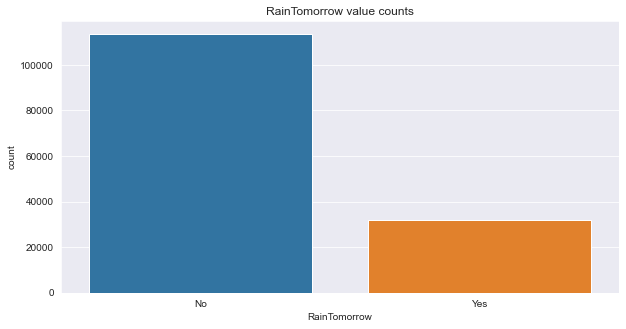

In [20]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
plt.title('RainTomorrow value counts')
sns.countplot(x=df["RainTomorrow"]);

**Analisis :**

Perbandingan data RainTomorrow sangat signifikan. Dimana data 'No' sejumlah 113.583 dan data 'Yes' sejumlah 31.877, yang berarti di Australia tidak sering terjadi hujan.

**Questions :** Bagaimana distribusi hujan berdasarkan lokasi di Australia?

**Visualizations :**

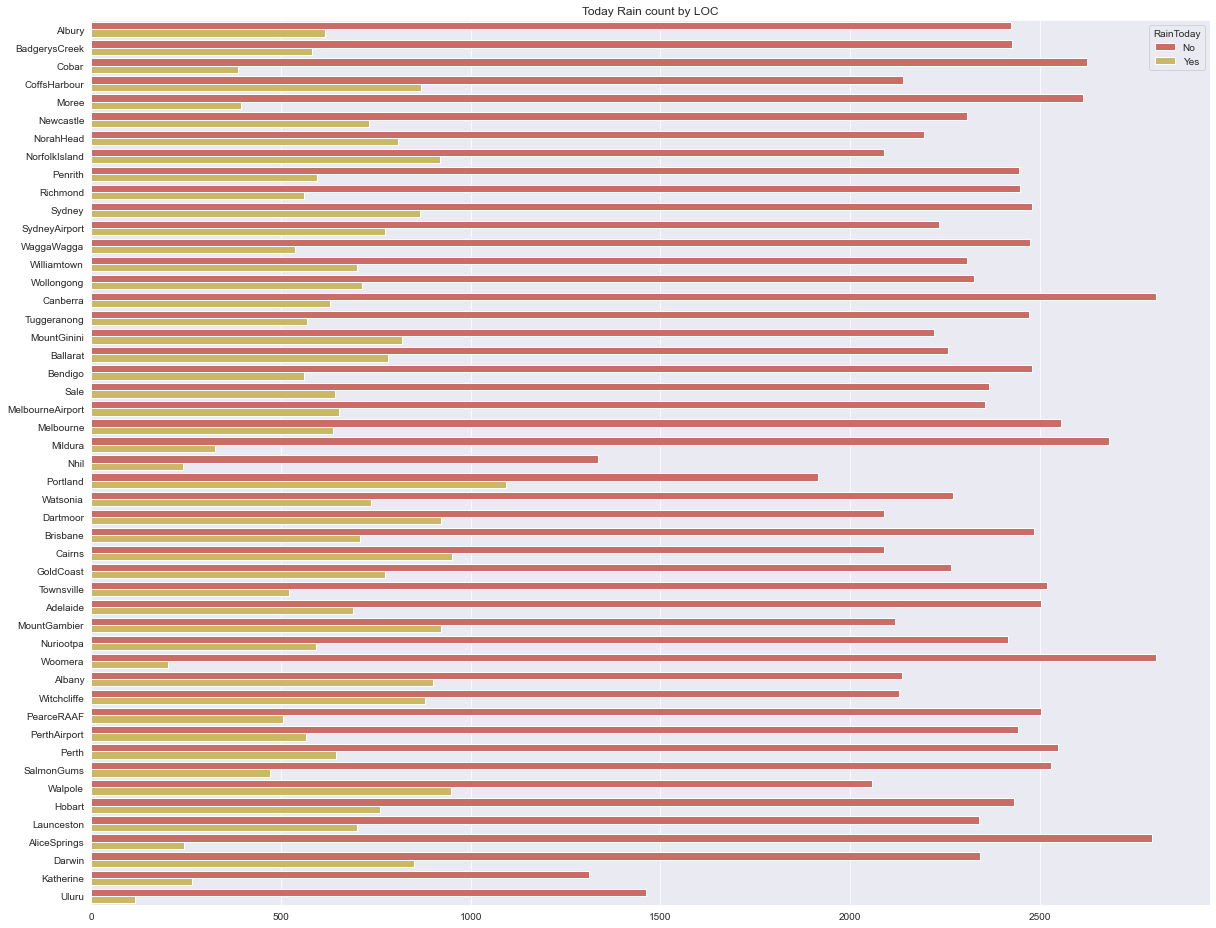

In [21]:
plt.figure(figsize=(17,13))
sns.countplot(data=df, y='Location', hue="RainToday", palette=sns.color_palette("hls", 8))

plt.title('Today Rain count by LOC')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

**Analisis :**

Daerah yang sering dilanda hujan adalah di Portland. Sedangkan daerah yang tidak sering terjadi hujan adalah di Woomera.

**Questions :** Berapa average rainfall berdasarkan rain tomorrow?

In [22]:
mean = df[['Rainfall','RainTomorrow']].groupby('RainTomorrow').mean().sort_values(by='Rainfall', ascending=True)
mean

,Rainfall
RainTomorrow,
No,1.268503
Yes,6.011852


**Analisis :**

RainTomorrow value No memiliki rata-rata Rainfall 1.268503.

RainTomorrow value Yes memiliki rata-rata Rainfall 6.011852

# Data Preprocessing

In [23]:
le = preprocessing.LabelEncoder()

df_encode = df.copy()
categorical_columns = ['WindGustDir','Location','WindDir9am','RainToday','RainTomorrow','WindDir3pm']
for col in categorical_columns:
    df_encode[col] = le.fit_transform(df_encode[col])

df_encode

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,4.8,8.4,13,44.0,13,14,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,2,7.4,25.1,0.0,4.8,8.4,14,44.0,6,15,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,2,12.9,25.7,0.0,4.8,8.4,15,46.0,13,15,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,2,9.2,28.0,0.0,4.8,8.4,4,24.0,9,0,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,2,17.5,32.3,1.0,4.8,8.4,13,41.0,1,7,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,23.4,0.0,4.8,8.4,0,31.0,9,1,...,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,0,0
145456,41,3.6,25.3,0.0,4.8,8.4,6,22.0,9,3,...,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,0,0
145457,41,5.4,26.9,0.0,4.8,8.4,3,37.0,9,14,...,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,0,0
145458,41,7.8,27.0,0.0,4.8,8.4,9,28.0,10,3,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


**Cek correlation antar column**

<AxesSubplot:>

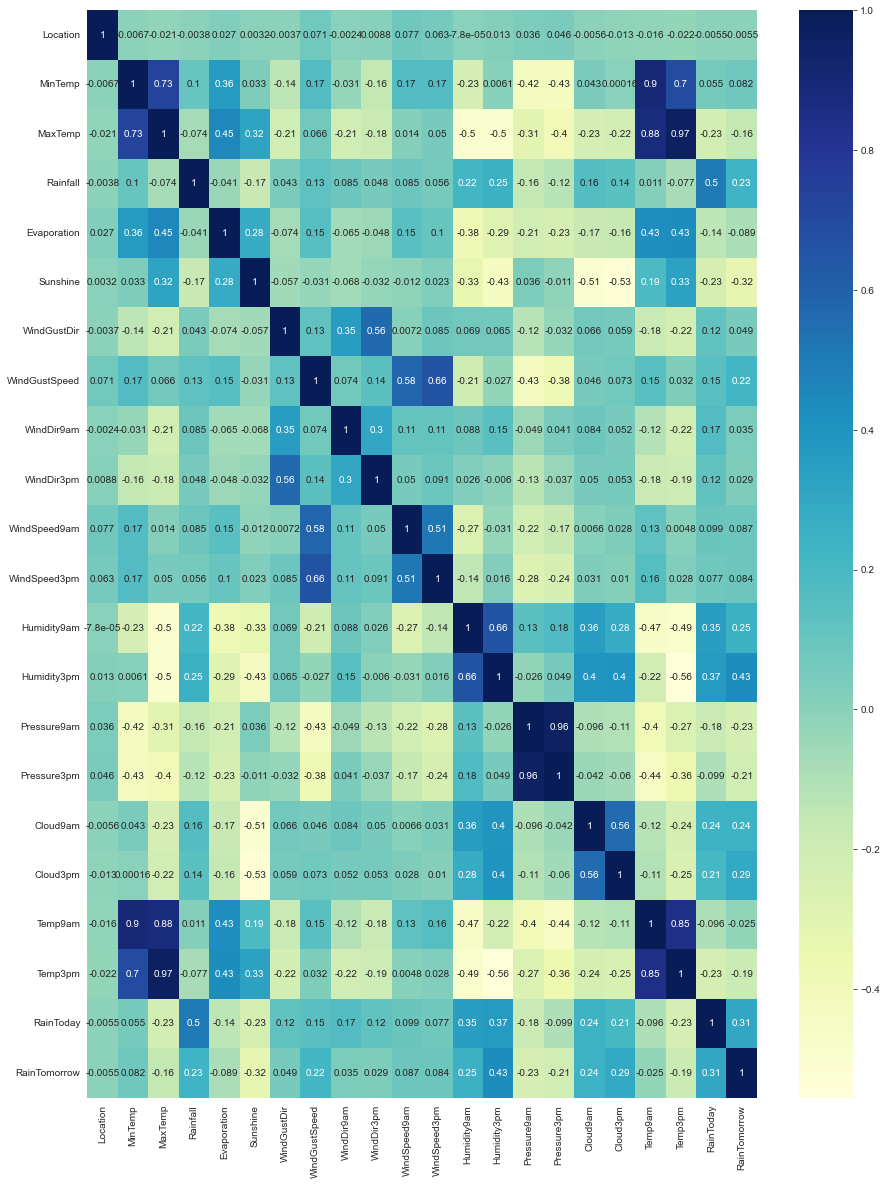

In [24]:
plt.figure(figsize=(15,20))
sns.heatmap(df_encode.corr(),annot=True, cmap="YlGnBu")

In [25]:
df_encode.corr()['RainTomorrow'].sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.433167
RainToday        0.305744
Cloud3pm         0.290610
Humidity9am      0.251415
Cloud9am         0.244242
Rainfall         0.233877
WindGustSpeed    0.220144
WindSpeed9am     0.086746
WindSpeed3pm     0.084214
MinTemp          0.082249
WindGustDir      0.048774
WindDir9am       0.035341
WindDir3pm       0.028890
Location        -0.005498
Temp9am         -0.025488
Evaporation     -0.088709
MaxTemp         -0.156523
Temp3pm         -0.187721
Pressure3pm     -0.211952
Pressure9am     -0.230950
Sunshine        -0.319412
Name: RainTomorrow, dtype: float64

Column dengan korelasi negatif terhadap kolom RainTomorrow akan di drop yaitu yang memiliki batas < 0.2,kecuali kolom Location karena akan dipakai dalam model.

In [26]:
df_encode = df_encode.drop(['WindSpeed9am', 'WindSpeed3pm', 'MinTemp', 'WindGustDir',
                            'WindDir9am', 'WindDir3pm', 'MaxTemp', 'Evaporation', 
                            'Sunshine', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', ], axis=1)
df_encode

,Location,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,2,0.6,44.0,71.0,22.0,8.0,5.0,0,0
1,2,0.0,44.0,44.0,25.0,5.0,5.0,0,0
2,2,0.0,46.0,38.0,30.0,5.0,2.0,0,0
3,2,0.0,24.0,45.0,16.0,5.0,5.0,0,0
4,2,1.0,41.0,82.0,33.0,7.0,8.0,0,0
...,...,...,...,...,...,...,...,...,...
145455,41,0.0,31.0,51.0,24.0,5.0,5.0,0,0
145456,41,0.0,22.0,56.0,21.0,5.0,5.0,0,0
145457,41,0.0,37.0,53.0,24.0,5.0,5.0,0,0
145458,41,0.0,28.0,51.0,24.0,3.0,2.0,0,0


# Modelling

**Determine X & Y**

In [27]:
X = df_encode.drop(['RainTomorrow'], axis=1)

y = df_encode['RainTomorrow']

In [28]:
X

,Location,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday
0,2,0.6,44.0,71.0,22.0,8.0,5.0,0
1,2,0.0,44.0,44.0,25.0,5.0,5.0,0
2,2,0.0,46.0,38.0,30.0,5.0,2.0,0
3,2,0.0,24.0,45.0,16.0,5.0,5.0,0
4,2,1.0,41.0,82.0,33.0,7.0,8.0,0
...,...,...,...,...,...,...,...,...
145455,41,0.0,31.0,51.0,24.0,5.0,5.0,0
145456,41,0.0,22.0,56.0,21.0,5.0,5.0,0
145457,41,0.0,37.0,53.0,24.0,5.0,5.0,0
145458,41,0.0,28.0,51.0,24.0,3.0,2.0,0


**Splitting train and test data**

In [29]:
# Split data 70:30
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10)

In [30]:
# Save user location for training and test set
train_id = np.array(X_train['Location'])
test_id = np.array(X_test['Location'])

**Feature Scaling**

In [31]:
# Standard Scaler
ss_X = StandardScaler()
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

**Function To Apply All Models**

In [32]:
# Plotting ROC Curve
def plot_roc_cur(fper, tper):
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


# Run given model
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0 = time.time()
    if verbose == False:
        model.fit(X_train, y_train, verbose=0)
    else:
        model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    time_taken = time.time()-t0
    cm = confusion_matrix(y_test, y_pred)

    print(f'Training set score: {round(model.score(X_train, y_train) * 100, 2)}%')
    print('--'*40)
    print("Accuracy = {}%".format(round(accuracy*100, 2)))
    print('--'*40)
    print("ROC Area under Curve = {}".format(roc_auc))
    print('--'*40)
    print("Time taken = {} menit".format(time_taken//60))
    print('--'*40)
    print("Classification Report")
    print(classification_report(y_test,y_pred,digits=5))
    print('--'*40)
    print('Confusion Matrix\n\n', cm)
    print('--'*40)
    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    fper, tper, thresholds = roc_curve(y_test, probs)
    plot_roc_cur(fper, tper)

    plot_confusion_matrix(model, X_test, y_test,
                          cmap=plt.cm.Blues, normalize='all')
    return model, accuracy, time_taken

## Logistic Regression

Training set score: 83.81%
--------------------------------------------------------------------------------
Accuracy = 83.48%
--------------------------------------------------------------------------------
ROC Area under Curve = 0.6940801944173254
--------------------------------------------------------------------------------
Time taken = 0.0 menit
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0    0.85742   0.94544   0.89928     34036
           1    0.69597   0.44272   0.54118      9602

    accuracy                        0.83482     43638
   macro avg    0.77670   0.69408   0.72023     43638
weighted avg    0.82190   0.83482   0.82049     43638

--------------------------------------------------------------------------------
Confusion Matrix

 [[32179  1857]
 [ 5351  4251]]
--------------------------------------------------------------------------------


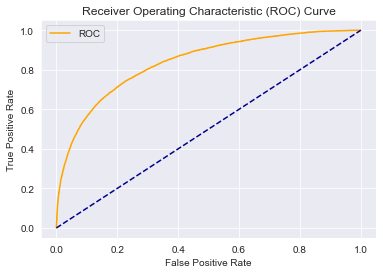

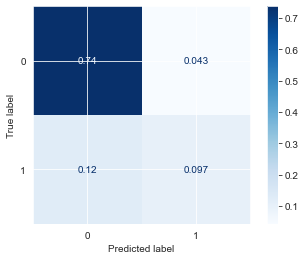

In [33]:
# Applying Logistic Regression on Data

LogR = LogisticRegression()
LogR, accuracy_dt,  tt_dt = run_model(LogR, X_train, y_train, X_test, y_test)

## SVM

Dikarenakan keterbatasan waktu untuk membangun model SVM, maka dataframe yang digunakan dibatasi hanya 50% yaitu sejumlah 72.730.

**Determine Dataframe, X, dan y.**

In [34]:
df_svm = df_encode.sample(72730)
df_svm

,Location,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
22638,27,0.2,56.0,48.0,46.0,2.0,2.0,0,0
137382,3,0.0,30.0,16.0,7.0,1.0,0.0,0,0
87948,8,19.6,33.0,71.0,70.0,7.0,6.0,1,0
64606,19,0.0,74.0,38.0,23.0,1.0,7.0,0,0
5640,4,0.0,28.0,68.0,37.0,5.0,5.0,0,0
...,...,...,...,...,...,...,...,...,...
11053,11,0.0,39.0,69.0,60.0,5.0,5.0,0,0
51250,40,0.2,39.0,93.0,67.0,5.0,5.0,0,1
27482,34,0.0,69.0,76.0,23.0,5.0,5.0,0,0
108843,1,2.6,39.0,82.0,69.0,6.0,6.0,1,0


In [35]:
X = df_svm.drop(['RainTomorrow'], axis=1)

y = df_svm['RainTomorrow']

**Splitting train and test data**

In [36]:
# Split data 70:30
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10)

In [37]:
# Save user location for training and test set
train_id = np.array(X_train['Location'])
test_id = np.array(X_test['Location'])

**Feature Scaling**

In [38]:
# Standard Scaler
ss_X = StandardScaler()
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

Training set score: 84.26%
--------------------------------------------------------------------------------
Accuracy = 83.6%
--------------------------------------------------------------------------------
ROC Area under Curve = 0.6778760143332175
--------------------------------------------------------------------------------
Time taken = 13.0 menit
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0    0.84820   0.96151   0.90131     16992
           1    0.74423   0.39424   0.51544      4827

    accuracy                        0.83601     21819
   macro avg    0.79622   0.67788   0.70837     21819
weighted avg    0.82520   0.83601   0.81594     21819

--------------------------------------------------------------------------------
Confusion Matrix

 [[16338   654]
 [ 2924  1903]]
--------------------------------------------------------------------------------


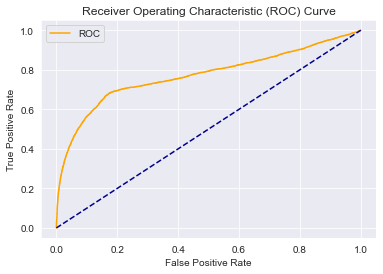

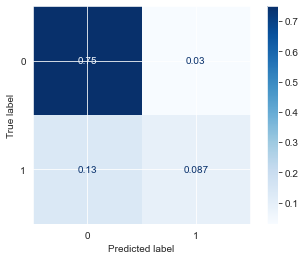

In [39]:
# Applying SVM on Data

svm = SVC(probability=True)
svm, accuracy_dt,  tt_dt = run_model(svm, X_train, y_train, X_test, y_test)

## Pickle

In [40]:
import pickle
pickle.dump(LogR, open('model_rain.pkl', 'wb'))

# Model Inference

**Try Prediction at :** https://fp2-rainpredict.herokuapp.com/

Saat memasukkan data, box kosong atas nantinya akan berisi hasil predict.

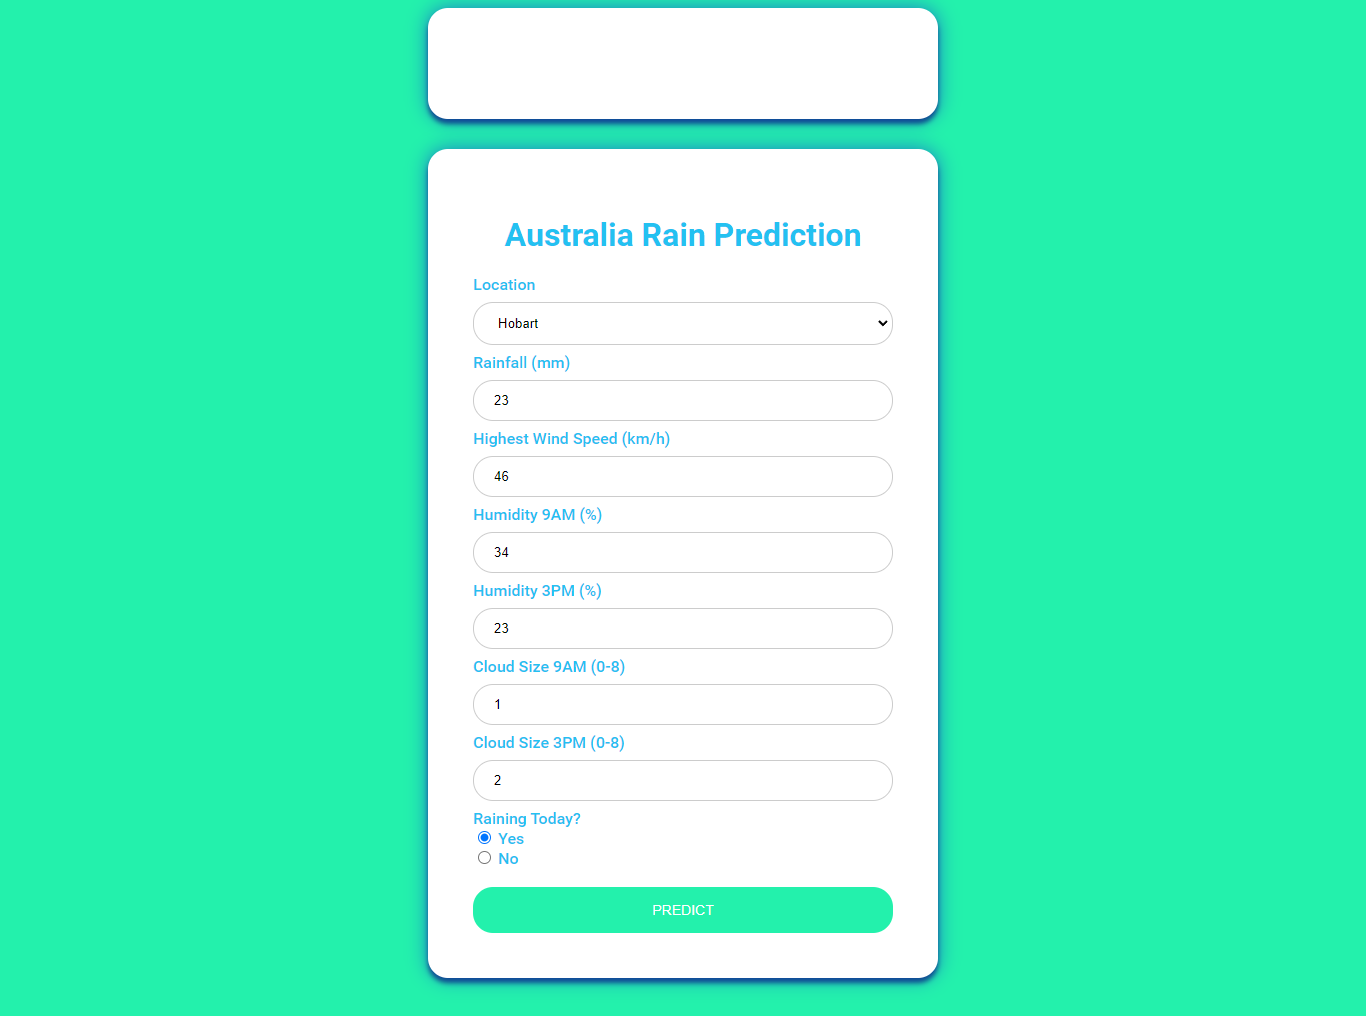

Setelah di predict, hasilnya tampil pada box diatas dan form kembali kosong.

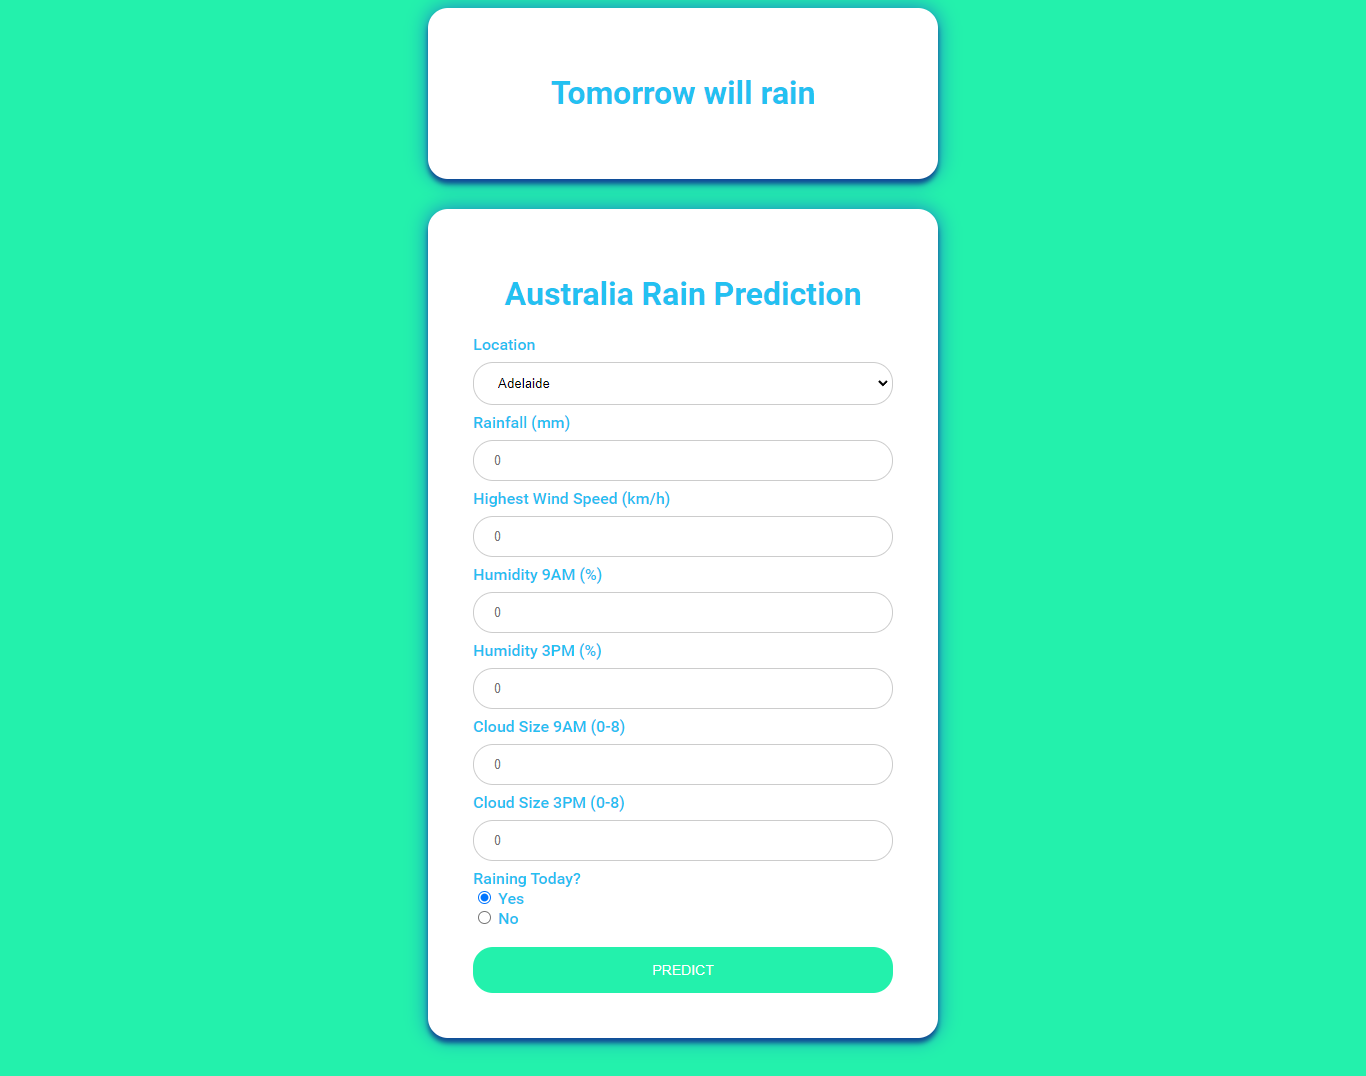

# Overal Analysis

Model Logistic Regression memiliki akurasi 83.48%. Pada confusion matrix menampilkan:
1. True Positives (Actual Positive:1 and Predict Positive:1) - 32179
2. True Negatives (Actual Negative:0 and Predict Negative:0) - 4251
3. False Positives (Actual Negative:0 but Predict Positive:1) - 5351
4. False Negatives (Actual Positive:1 but Predict Negative:0) - 1857


Model SVM dengan 50% data, memiliki akurasi 83.6%. Pada confusion matrix menampilkan :
1. True Positives (Actual Positive:1 and Predict Positive:1) - 16338
2. True Negatives (Actual Negative:0 and Predict Negative:0) - 1903
3. False Positives (Actual Negative:0 but Predict Positive:1) - 2924
4. False Negatives (Actual Positive:1 but Predict Negative:0) - 654

Berdasarkan hal tersebut, model yang dipilih adalah Logistic Regression, karena model pada tersebut menggunakan semua data untuk modelling, sehingga model tersebut sudah terlatih dengan baik.